In [145]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [146]:
data = []
labels = []
with open("training_set.tsv" , encoding='utf-8') as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    for i, line in enumerate(tsvreader):
        if i %2 == 0:
            data.extend(line)
        else : 
            labels.extend(line)
print(len(data), len(labels))


5778 5778


In [147]:
df = pd.DataFrame(zip(data,labels),columns = ['sentence','sentiment'])
removed_word = ''' ！？｡*。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏.+,-'''
removed_word += '?~!@#$%^&*()_+'
removed_word += '1234567890' +'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
removed_word += 'ａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ'
print(removed_word)
df['sentence'] = df['sentence'].apply(lambda sen : ''.join([word for word in sen if word not in removed_word]))

 ！？｡*。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏.+,-?~!@#$%^&*()_+1234567890abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ


In [148]:
def remove(sen):
    brands = ['佳能','尼康','富士','索尼','莱卡','徕卡','卡西欧','无敌兔','适马']
    for i in brands :
        if i in sen:
            sen = sen.replace(i,'')
    return sen
df['sentence']=df['sentence'].apply(lambda x : remove(x))

In [149]:
mask = np.random.rand(len(df)) <0.9
train = df[mask]
test = df[~mask]
test.to_csv('test.tsv',sep='\t',index=False)

In [150]:
from random import shuffle
neg = train[train['sentiment']=='negative']['sentence'].values
pos = train[train['sentiment']=='positive']['sentence'].values
def append_data(train,sen_l,sentiment):
    shuffle(sen_l)
    dict_list = []
    for a,b in zip(sen_l[0::2],sen_l[1::2]):
        dict_list.append({'sentence':a+b,'sentiment':sentiment})
    train = train.append(pd.DataFrame(dict_list))
    return train
for i in range(8):
    train = append_data(train,neg,'negative')
for i in range(6):
    train = append_data(train,neg,'positive')

In [151]:
train = train.sample(train.shape[0]).reset_index(drop=True)
print(train)

                          sentence sentiment
0                          用的是高速连拍   neutral
1         可是定焦也太小气了如果能忍受它缓慢的存储速度的话  positive
2                工作的时候朋友借了台给我使用了三天   neutral
3                对焦真的没什么优势比偏红偏假的色彩  negative
4                   晚上拍照比较吃力操作够复杂的  negative
5                  出来的片子更糟感觉手柄还是略小  negative
6                          三星的一些片子   neutral
7                        本不打算看半幅单反   neutral
8                       手柄也太小没有闪光灯  negative
9                         价格日本的在左右   neutral
10                        感谢格力达俱乐部   neutral
11              洞妖的明显要慢于的除了没有触摸屏以外  positive
12          但在大光圈长焦和闪光灯上还有不足对焦速度一般  negative
13                        速度奇慢的非常差  negative
14             手感操控性能画质已然全面落后但体积不小  negative
15        同样用测试对焦用过/系统的人绝对会受不了的触摸屏  negative
16              掉皮现象以及上手旧的问题已经明显改观   neutral
17               尤其是曝光锁定键防抖没有想像中管用  negative
18                         试机的几点感受   neutral
19                 能够用上像这样的对焦系统就好了  positive
20                      但有一个最重要的问题   neutral
21        

In [152]:
train.to_csv('train.tsv',sep='\t',index=False)

(7948, 2)


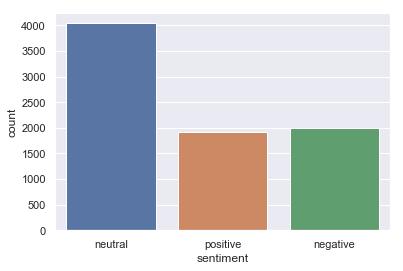

In [153]:
print(train.shape)
ax = sns.countplot(x='sentiment',  data=train)